In [1]:
from poly_fuzzer.common.abstract_grammar import AbstractGrammar
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_coverage(output, budget, title, i):
    plt.plot(np.arange(budget), output['coverage'], label='run #'+str(i+1))
    plt.xlabel('Number of Input Used')
    plt.ylabel('Number of Lines Covered')
    plt.title(title)
    plt.legend()

# Q1
## Cgi Grammar

In [3]:
cgi_gram = {
"<start>": ["<cgi-str>"],
"<cgi-str>": ["<section><section><section><section>"],
"<section>":["+","%<hex-c><hex-c>","<str>"],
"<hex-c>":["0","1","2","3","4","5","6","7","8","9","a","b","c","d","e","f","A","B","C","D","E","F"],
"<str>":["<char><char><char><char> "],
"<char>":["a","z","e","r","t","y","u","i","o","p","q","s","d","f","g","h","j","k","l","m","w","x","c","v","b","n"]
}

cgi_grammar = AbstractGrammar(cgi_gram)

cgi_input = cgi_grammar.generate_input()

print(cgi_input)

+astl +pzrq 


In [4]:
from cgi_decode import cgi_decode
from poly_fuzzer.common.abstract_executor import AbstractExecutor
from poly_fuzzer.common.abstract_seed import AbstractSeed
from poly_fuzzer.fuzzers.cgi_fuzzer import CGIFuzzer
from poly_fuzzer.power_schedules.cgi_power_schedule import CGI_Power_schedule


In [5]:
def cgi_basic(budget=100):
    executor = AbstractExecutor(cgi_decode)
    seeds = [AbstractSeed("avbaze"), AbstractSeed("afnzie%12")]

    fuzzer = CGIFuzzer(executor,seeds)
    output = fuzzer.run_fuzzer(budget=budget)  
    assert output is not None
    return output

In [6]:
a = cgi_basic()

Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
string index out of range
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
string index out of range
Invalid encoding
Invalid encoding
string index 

In [7]:
def cgi_power(budget=100):
    executor = AbstractExecutor(cgi_decode)
    seeds = [AbstractSeed("avbaze"), AbstractSeed("afnzie%12")]
    powerschedule = CGI_Power_schedule()

    fuzzer = CGIFuzzer(executor,seeds,power_schedule=powerschedule)
    output = fuzzer.run_fuzzer(budget=budget)  
    assert output is not None
    return output

In [8]:
a = cgi_power()

Invalid encoding
string index out of range
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
string index out of range
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encod

In [9]:
def cgi_w_grammar(grammar,budget=100):
    executor = AbstractExecutor(cgi_decode)
    seeds = [AbstractSeed(grammar.generate_input()) for i in range(8)]
    fuzzer = CGIFuzzer(executor,seeds)
    output = fuzzer.run_fuzzer(budget=budget)  
    assert output is not None
    return output

In [10]:
a = cgi_w_grammar(cgi_grammar)

Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encodi

In [11]:
def cgi_w_grammar_power(grammar,budget=100):
    executor = AbstractExecutor(cgi_decode)
    seeds = [AbstractSeed(grammar.generate_input()) for i in range(8)]
    powerschedule = CGI_Power_schedule()
    fuzzer = CGIFuzzer(executor,seeds,power_schedule=powerschedule)
    output = fuzzer.run_fuzzer(budget=budget)  
    assert output is not None
    return output

In [12]:
a = cgi_w_grammar_power(cgi_grammar)

Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encodi

In [13]:
basic_out = cgi_basic()
power_out = cgi_power()
gram_out = cgi_w_grammar(cgi_grammar)
power_gram_out = cgi_w_grammar_power(cgi_grammar)

Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
string index out of range
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
string index out of range
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
Invalid encoding
string index out of range
Invalid encoding
Inva

In [14]:
def all_cgi(cgi_grammar,budget=100):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    plt.subplot(2, 2, 1) 
    for i in range(10):
        plot_coverage(cgi_basic(budget),budget,"CGI Basic mutation with fixed start seeds",i)
    plt.subplot(2, 2, 2) 
    for i in range(10):
        plot_coverage(cgi_power(budget),budget,"CGI Mutation with fixed start seeds with power schedule",i)
    plt.subplot(2, 2, 3) 
    for i in range(10):
        plot_coverage(cgi_w_grammar(cgi_grammar,budget),budget,"CGI Basic mutation with grammar as start seed",i)
    plt.subplot(2, 2, 4) 
    for i in range(10):
        plot_coverage(cgi_w_grammar_power(cgi_grammar,budget),budget,"CGI Mutation with grammar and power schedule",i)
    

In [15]:
#all_cgi(cgi_grammar)

## Q2


In [16]:
from urllib.parse import urlparse
import string


In [17]:
urlgram = {
"<start>": ["<protocol><domain>/<path>?<query>"],
"<protocol>":["","http://","https://"],
"<domain>": ["<before><hostname>.<ext>"],
"<path>":["<string>","<path>/<string>"],
"<query>":["<string>=<string>","<query>&<string>=<string>"],
"<hostname>":["<string>","google","facebook","uber"],
"<ext>":["com","qc.ca","org","fr","ca","io","tv","be","ch"],
"<before>":["www.",""],
"<string>":["<char>" * i for i in range(3, 11)],
"<char>": list(string.ascii_letters)+list(string.digits)
}

url_grammar = AbstractGrammar(urlgram)

url_input = url_grammar.generate_input()

print(url_input)

google.io/BEByG1?foa0pU2t=WcdeAwn&ulalR=P1Q


In [18]:
from poly_fuzzer.fuzzers.url_fuzzer import URLFuzzer
from poly_fuzzer.power_schedules.url_power_schedule import URL_Power_schedule

In [19]:
def url_basic(budget=100):
    executor = AbstractExecutor(urlparse)
    seeds = [AbstractSeed("google.com"), AbstractSeed("https://www.facebook.com"), AbstractSeed("http://polymtl.qc.ca/?id=23"), AbstractSeed("www.poly.edu")]
    fuzzer = URLFuzzer(executor,seeds)
    output = fuzzer.run_fuzzer(budget=budget)  
    assert output is not None
    return output

In [20]:
def url_power(budget=100):
    executor = AbstractExecutor(urlparse)
    seeds = [AbstractSeed("google.com"), AbstractSeed("https://www.facebook.com"), AbstractSeed("http://polymtl.qc.ca/?id=23"), AbstractSeed("www.poly.edu")]
    powerschedule = URL_Power_schedule()
    fuzzer = URLFuzzer(executor,seeds,power_schedule=powerschedule)
    output = fuzzer.run_fuzzer(budget=budget)  
    assert output is not None
    return output

In [21]:
def url_w_grammar(grammar,budget=100):
    executor = AbstractExecutor(urlparse)
    seeds = [AbstractSeed(grammar.generate_input()) for i in range(20)]
    fuzzer = URLFuzzer(executor,seeds)
    output = fuzzer.run_fuzzer(budget=budget)  
    assert output is not None
    return output

In [22]:
def url_w_grammar_power(grammar,budget=100):
    executor = AbstractExecutor(urlparse)
    seeds = [AbstractSeed(grammar.generate_input()) for i in range(20)]
    powerschedule = URL_Power_schedule()
    fuzzer = URLFuzzer(executor,seeds,power_schedule=powerschedule)
    output = fuzzer.run_fuzzer(budget=budget)  
    assert output is not None
    return output

In [23]:
def all_url(grammar,budget=200):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    plt.subplot(2, 2, 1) 
    for i in range(10):
        plot_coverage(url_basic(budget),budget,"UrlParse Basic mutation with fixed start seeds",i)
    plt.subplot(2, 2, 2) 
    for i in range(10):
        plot_coverage(url_power(budget),budget,"UrlParse Mutation with fixed start seeds with power schedule",i)
    plt.subplot(2, 2, 3) 
    for i in range(10):
        plot_coverage(url_w_grammar(grammar,budget),budget,"UrlParse Basic mutation with grammar as start seed",i)
    plt.subplot(2, 2, 4) 
    for i in range(10):
        plot_coverage(url_w_grammar_power(grammar,budget),budget,"UrlParse Mutation with grammar and power schedule",i)
    

In [24]:
#all_url(url_grammar)

## Q3

In [25]:
html_gram = {
    "<start>": ["[!DOCTYPE html]<html>"],
    "<html>": ["[html]<head><body>[/html]"],
    "<head>": ["[head]<meta><title><styles><scripts>[/head]"],
    "<meta>": ["[meta charset='UTF-8']", ""],
    "<title>": ["[title]<text>[/title]"],
    "<styles>": ["[style]<css>[/style]", ""],
    "<scripts>": ["[script]<js>[/script]", ""],
    "<body>": ["[body]<tag><tag><tag><tag>[/body]"],
    "<tag>": [
        "[p]<text>[/p]", "[h1]<text>[/h1]", "[h2]<text>[/h2]",
        "[ul]<list_items>[/ul]", "[ol]<list_items>[/ol]",
        "[a href='<url>']<text>[/a]", "[img src='<url>' alt='<text>']",
        "[div]<tag>[/div]", "[span]<text>[/span]", 
        "[table]<table_content>[/table]"
    ],
    "<list_items>": ["[li]<text>[/li]<list_items>", "[li]<text>[/li]"],
    "<table_content>": [
        "[tr][td]<text>[/td][td]<text>[/td][/tr]<table_content>", 
        "[tr][td]<text>[/td][td]<text>[/td][/tr]"
    ],
    "<text>": ["<char>" * i for i in range(5, 21)],
    "<char>": list(string.ascii_letters) + list(string.digits) + [" ", ".", ",", "!"],
    "<css>": ["body { background-color: #fff; }", "p { color: #333; }"],
    "<js>": ["console.log('Hello, world!');", "alert('Welcome!');","alert('<text>')","console.log('<text>')"],
    "<url>": ["https://example.com", "http://site.org", "/local/path"]
}

html_grammar = AbstractGrammar(html_gram)

html_input = html_grammar.generate_input()

print(html_input)

<!DOCTYPE html><html><head><meta charset='UTF-8'><title>Yhm,f1</title><script>console.log('rH2uAF.BRnx!aDB')</script></head><body><h2>tQ.zc8</h2><div><h2>3SPD9IYjjUQ9MA8nU</h2></div><div><table><tr><td>OI,WZzCC</td><td>9HwYR3lSW2bhCZxTdVw</td></tr></table></div><ol><li>nq Fd2Lyk</li><li>FkxTZGv.pT2JZiD7q</li></ol></body></html>


In [26]:
from poly_fuzzer.fuzzers.html_fuzzer import HTMLfuzzer
from poly_fuzzer.power_schedules.html_power_schedule import HTML_Power_schedule
from html.parser import HTMLParser

html1 = """<!DOCTYPE html><html lang="en"><head><meta charset="UTF-8"><meta name="viewport" content="width=device-width, initial-scale=1.0"><title>Basic Page</title></head><body><h1>Welcome to My Basic Page</h1><p>This is a simple HTML document with a heading and a paragraph.</p></body></html>"""
html2 = """<!DOCTYPE html><html lang="en"><head><meta charset="UTF-8"><meta name="viewport" content="width=device-width, initial-scale=1.0"><title>Page with a Link</title></head><body><h1>Visit My Website</h1><p>This is a page with a link to <a href="https://www.example.com">Example</a>.</p></body></html>"""
html3 = """<!DOCTYPE html><html lang="en"><head><meta charset="UTF-8"><meta name="viewport" content="width=device-width, initial-scale=1.0"><title>List Example</title></head><body><h1>My Favorite Fruits</h1><ul><li>Apple</li><li>Banana</li><li>Orange</li></ul></body></html>"""

def html_basic(budget=500):
    executor = AbstractExecutor(HTMLParser().feed)
    seeds = [AbstractSeed(html1), AbstractSeed(html2), AbstractSeed(html3)]
    fuzzer = HTMLfuzzer(executor,seeds)
    output = fuzzer.run_fuzzer(budget=budget)  
    assert output is not None
    return output


def html_power(budget=500):
    executor = AbstractExecutor(HTMLParser().feed)
    seeds = [AbstractSeed(html1), AbstractSeed(html2), AbstractSeed(html3)]
    power = HTML_Power_schedule()
    fuzzer = HTMLfuzzer(executor,seeds,power_schedule=power)
    output = fuzzer.run_fuzzer(budget=budget)  
    assert output is not None
    return output


def html_wgram_power(gram,budget=500):
    executor = AbstractExecutor(HTMLParser().feed)
    seeds = [AbstractSeed(gram.generate_input()) for i in range(20)]
    power = HTML_Power_schedule()
    fuzzer = HTMLfuzzer(executor,seeds,power_schedule=power)
    output = fuzzer.run_fuzzer(budget=budget)  
    assert output is not None
    return output

def html_wgram(gram,budget=500):
    executor = AbstractExecutor(HTMLParser().feed)
    seeds = [AbstractSeed(gram.generate_input()) for i in range(20)]
    fuzzer = HTMLfuzzer(executor,seeds,)
    output = fuzzer.run_fuzzer(budget=budget)  
    assert output is not None
    return output



In [27]:
def all_html(grammar,budget=200):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    plt.subplot(2, 2, 1) 
    for i in range(10):
        plot_coverage(html_basic(budget),budget,"UrlParse Basic mutation with fixed start seeds",i)
    plt.subplot(2, 2, 2) 
    for i in range(10):
        plot_coverage(html_power(budget),budget,"UrlParse Mutation with fixed start seeds with power schedule",i)
    plt.subplot(2, 2, 3) 
    for i in range(10):
        plot_coverage(html_wgram(grammar,budget),budget,"UrlParse Basic mutation with grammar as start seed",i)
    plt.subplot(2, 2, 4) 
    for i in range(10):
        plot_coverage(html_wgram_power(grammar,budget),budget,"UrlParse Mutation with grammar and power schedule",i)
    

In [28]:
#html_wgram_power(html_grammar,500)

In [29]:
#all_html(html_grammar,500)

KeyboardInterrupt: 

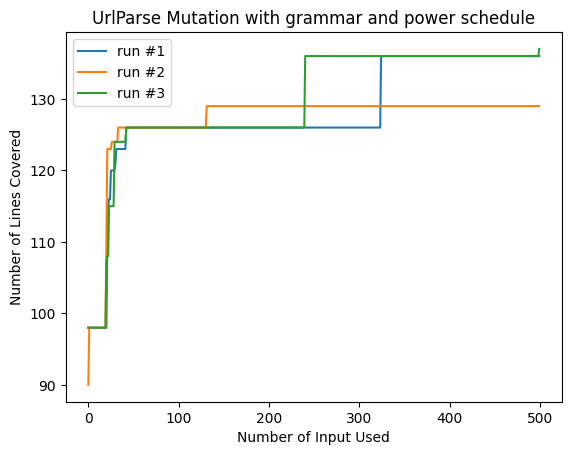

In [30]:
for i in range(10):
        plot_coverage(html_wgram_power(html_grammar,500),500,"UrlParse Mutation with grammar and power schedule",i)